In [1]:
#Sentiment Analysis using Deep learning with LSTM layer
# import all the required package libraries
import numpy as np 
import pandas as pd
import string, re
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense
from keras.callbacks import EarlyStopping


In [2]:
#Load the dataset from remote link into pandas dataframe and rename the columns as "review" and "Sentiment"
data = pd.read_csv("https://raw.githubusercontent.com/rupeshbiradar40/sentiment-analysis-using-Deep-Learning-and-logistic-regression/main/sentiment%20labelled%20sentences/imdb_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Sentence', 'Sentiment'])

In [3]:
#List top 10 rows and infromation about the data
print(data.shape)
data.head(10)
data.info()

(748, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   748 non-null    object
 1   Sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [4]:
# check for missing values and reset the indexes
data.isnull().sum()


Sentence     0
Sentiment    0
dtype: int64

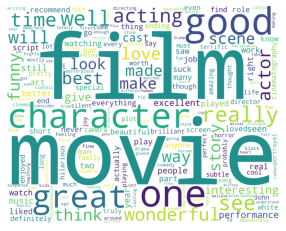

In [5]:
# plot wordcloud of positive reviews
data_pos = data[ data['Sentiment'] == 1]
data_pos = data_pos['Sentence']
data_neg = data[ data['Sentiment'] == 0]
data_neg = data_neg['Sentence']
positive_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_pos))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

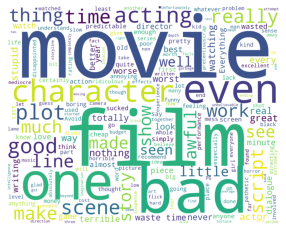

In [6]:
# plot wordcloud pf negative reviews
negative_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_neg))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

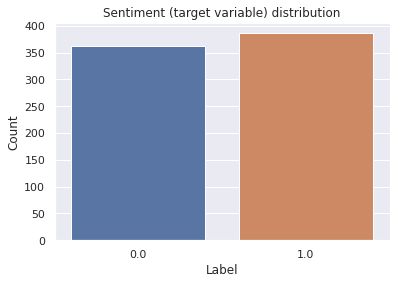

In [7]:
# plot the distribution of positive and negative sentiments
sns.set(style="darkgrid")
b = sns.countplot(x='Sentiment',
                  data = data.drop(['Sentence'], axis=1).astype(float))
b.axes.set_title('Sentiment (target variable) distribution')
b.set_xlabel("Label")
b.set_ylabel("Count")
plt.show()

In [8]:
# remove punctuations and special characters form the review sentences
def remove_punct(x):
    comp = re.compile("[%s\d]" % re.escape(string.punctuation))
    return " ".join(comp.sub(" ", str(x)).split()).lower()
data['Sentence'] = data['Sentence'].apply(remove_punct)

In [9]:
# convert the reviews into tokens and then convert them into numerical sequence by 0 padding wherever necessary
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['Sentence'].values)
X = tokenizer.texts_to_sequences(data['Sentence'].values)
X = pad_sequences(X)
Y = data['Sentiment'].values

In [10]:
# split the dataset into train and test set using scikitlearn train_test_split library function
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.80, test_size = 0.2, random_state=25)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(598, 1319) (598,)
(150, 1319) (150,)


In [29]:
# define Deep Neural network model with embedding layer, LSTM units and two dense layers with sigmoid acctivation function
# Model 1
embedding_dimension = 64
lstm_output = 16
batch_size = 10
model = Sequential()
model.add(Embedding(max_features, embedding_dimension, input_length=X.shape[1]))
model.add(LSTM(lstm_output))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1319, 64)          128000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                850       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 134,085
Trainable params: 134,085
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Model 2
embedding_dimension = 64
lstm_output = 16
batch_size = 20
model = Sequential()
model.add(Embedding(max_features, embedding_dimension, input_length=X.shape[1]))
model.add(LSTM(lstm_output))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1319, 64)          128000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 133,201
Trainable params: 133,201
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Model 3
embedding_dimension = 64
lstm_output = 16
batch_size = 32
model = Sequential()
model.add(Embedding(max_features, embedding_dimension, input_length=X.shape[1]))
model.add(LSTM(lstm_output))
model.add(Dense(250,activation='sigmoid'))
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1319, 64)          128000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_3 (Dense)              (None, 250)               4250      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 137,685
Trainable params: 137,685
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
# train model on training dataset
history=model.fit(X_train,Y_train,epochs=5,batch_size=batch_size,validation_data=(X_test, Y_test),callbacks = [EarlyStopping(monitor='val_accuracy',min_delta=0.001,patience=2,verbose=1)])

Epoch 1/5
60/60 [==============================] - 32s 490ms/step - loss: 2.7666 - accuracy: 0.4896 - val_loss: 0.7172 - val_accuracy: 0.5600
Epoch 2/5
60/60 [==============================] - 29s 479ms/step - loss: 0.6535 - accuracy: 0.6078 - val_loss: 0.6216 - val_accuracy: 0.6867
Epoch 3/5
60/60 [==============================] - 29s 488ms/step - loss: 0.4735 - accuracy: 0.8253 - val_loss: 0.5901 - val_accuracy: 0.7800
Epoch 4/5
60/60 [==============================] - 29s 486ms/step - loss: 0.2360 - accuracy: 0.9461 - val_loss: 0.9589 - val_accuracy: 0.7200
Epoch 5/5
60/60 [==============================] - 29s 486ms/step - loss: 0.1110 - accuracy: 0.9565 - val_loss: 0.8359 - val_accuracy: 0.7400
Epoch 00005: early stopping


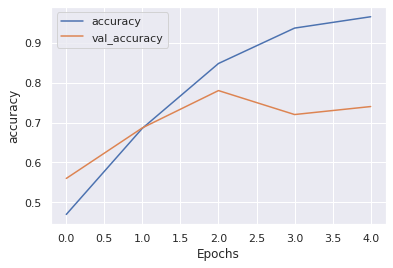

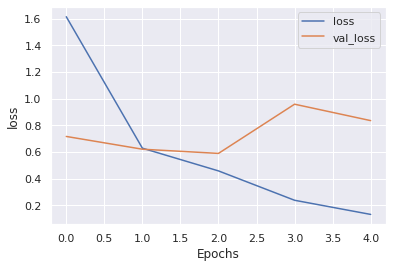

In [31]:
# plot the model accuracy and loss along with validation set accuracy and validation set loss
def plot_graphs(history, string):
        plt.plot(history.history[string])
        plt.plot(history.history['val_'+string])
        plt.xlabel("Epochs")
        plt.ylabel(string)
        plt.legend([string, 'val_'+string])
        plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [32]:
# feed test data to the model to predict sentiments and fina accuracy
predictions_nn_train = model.predict(X_train)
predictions_nn_test = model.predict(X_test)
for i in range(len(predictions_nn_train)):
    if predictions_nn_train[i][0] < 0.5:
        predictions_nn_train[i][0] = 0
    else:
        predictions_nn_train[i][0] = 1
        
for i in range(len(predictions_nn_test)):
    if predictions_nn_test[i][0] < 0.5:
        predictions_nn_test[i][0] = 0
    else:
        predictions_nn_test[i][0] = 1

print('Train accuracy:', accuracy_score(Y_train, predictions_nn_train))
print('Test accuracy', accuracy_score(Y_test, predictions_nn_test))

Train accuracy: 0.9765886287625418
Test accuracy 0.74


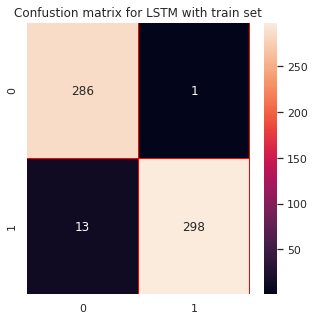

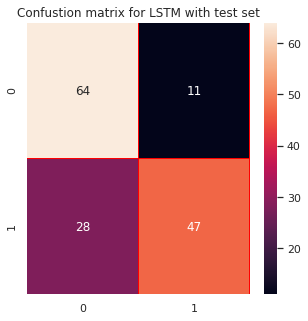

In [33]:
# plot confustion matrix for both training and testing dataset
cnf_matrix_train = confusion_matrix(Y_train, predictions_nn_train)
f,ax=plt.subplots(figsize=(5,5))
ax.set_title('Confustion matrix for LSTM with train set')
sns.heatmap(cnf_matrix_train,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

cnf_matrix_test = confusion_matrix(Y_test, predictions_nn_test)
f,ax=plt.subplots(figsize=(5,5))
ax.set_title('Confustion matrix for LSTM with test set')
sns.heatmap(cnf_matrix_test,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)


In [34]:
# find out the erronoues predictions and
dictionary = tokenizer.word_index
sentences = []
for j in range(len(X_test)):
    sentence = []
    for i in range(len(X_test[j])):
        if X_test[j][i] == 0:
            continue
        else:
            for key, val in dictionary.items():
                if dictionary[key] == X_test[j][i]:
                    sentence.append(key)
    sentences.append(sentence)
    
err_analysis = pd.DataFrame({'Sentences': sentences,
                             'y_true': Y_test,
                             'y_pred': predictions_nn_test.reshape(150,)})

errors = err_analysis.loc[err_analysis['y_pred']!=err_analysis['y_true']]
errors.head(10)

,Sentences,y_true,y_pred
1,"[there, s, barely, a, boring, moment, in, the,...",1,0.0
17,"[so, for, our, enjoyment, we, get, to, see, th...",1,0.0
26,"[if, there, was, ever, a, movie, that, needed,...",1,0.0
27,"[the, plot, has, more, holes, than, a, of, and...",0,1.0
28,"[recommend, with]",1,0.0
30,"[a, mature, subtle, script, that, and, occasio...",1,0.0
31,"[it, s, one, of, the, movies, i, need, to, see...",1,0.0
32,"[i, don, t, think, you, will, be, disappointed]",1,0.0
39,"[the, things, that, the, four, kids, get, them...",1,0.0
44,"[was, pretty, good, as, in, places, compelling...",1,0.0


In [35]:
# Sentiment Analysis using Logistic Regression
# download nltk packages "punkt" and "wordnet"
import re
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
# load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/rupeshbiradar40/sentiment-analysis-using-Deep-Learning-and-logistic-regression/main/sentiment%20labelled%20sentences/imdb_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Sentence', 'Sentiment'])

In [45]:
# remove punctuations and special characters form the review sentences
def remove_punct(x):
    comp = re.compile("[%s\d]" % re.escape(string.punctuation))
    return " ".join(comp.sub(" ", str(x)).split()).lower()
data['Sentence'] = data['Sentence'].apply(remove_punct)

In [46]:
# split the data into set of train and test dataframes
x_train, x_test, y_train, y_test = train_test_split(data['Sentence'], data['Sentiment'], test_size=0.1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(673,) (673,) (75,) (75,)


In [47]:
# TfidfVectorizer to transform words into features
vectorizer = TfidfVectorizer(min_df=2)
vectorized_x_train = vectorizer.fit_transform(x_train)
vectorized_x_test = vectorizer.transform(x_test)
vectorizer.get_feature_names()[:20]

['ability',
 'about',
 'above',
 'absolutely',
 'accused',
 'achievement',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actually',
 'adaptation',
 'addition',
 'adorable',
 'advise',
 'aerial']

In [48]:
#Apply Logistic Regression Classification Algorithm
model=LogisticRegression(max_iter=10000,solver='saga')
model.fit(vectorized_x_train,y_train)
predictions_train = model.predict(vectorized_x_train)
predictions_test = model.predict(vectorized_x_test)

print('Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Test Accuracy:', accuracy_score(y_test, predictions_test))

Train Accuracy: 0.9361069836552749
Test Accuracy: 0.76


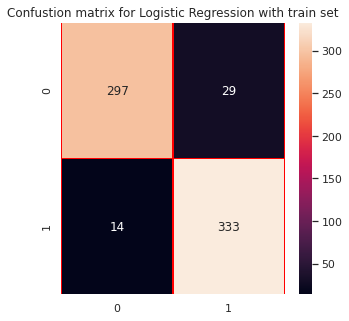

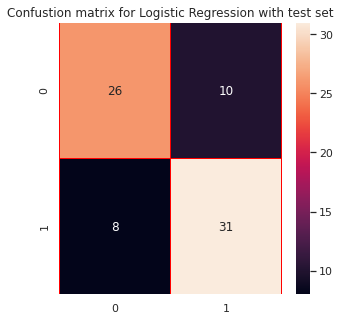

In [49]:
# display confusion matrix for train and test data
confustion_mat_train=confusion_matrix(y_train, predictions_train)
f,ax=plt.subplots(figsize=(5,5))
ax.set_title('Confustion matrix for Logistic Regression with train set')
sns.heatmap(confustion_mat_train,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

confustion_mat_test=confusion_matrix(y_test, predictions_test)
f,ax=plt.subplots(figsize=(5,5))
ax.set_title('Confustion matrix for Logistic Regression with test set')
sns.heatmap(confustion_mat_test,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

In [50]:
dictionary = tokenizer.word_index
sentences = []
for j in range(len(x_test)):
    sentence = []
    for i in range(len(x_test.iloc[j].split(" "))):
        if x_test.iloc[j].split(" ")[i] == 0:
            continue
        else:
            for key, val in dictionary.items():
                if key == x_test.iloc[j].split(" ")[i]:
                    sentence.append(key)
    sentences.append(sentence)
    
err_analysis = pd.DataFrame({'Sentences': sentences,
                             'y_true': y_test,
                             'y_pred': predictions_test.reshape(75,)})

errors = err_analysis.loc[err_analysis['y_pred']!=err_analysis['y_true']]
errors.head(10)

,Sentences,y_true,y_pred
151,"[the, guy, who, said, he, s, had, better, dial...",0,1
579,"[the, film, has, an, ultra, cheap, look, to, it]",0,1
307,"[about, ten, minutes, into, this, film, i, sta...",0,1
488,"[this, is, just, a, great, movie]",1,0
258,"[this, film, and, i, use, that, word, loosely,...",0,1
620,"[the, acting, as, you, d, expect, from, this, ...",1,0
5,"[the, rest, of, the, movie, lacks, art, charm,...",0,1
73,"[i, cannot, believe, that, the, actors, agreed...",0,1
616,"[you, share, general, loewenhielm, s, exquisit...",1,0
570,"[ps, the, only, scene, in, the, movie, that, w...",1,0
